# Numerical Representation of Text Data
### Author: Ariel Cintron, Ph.D.

This notebook has the following objectives:
1. Read the text data.
2. Convert text into smaller units called tokens.
3. Evaluate basic functions for text processing involving stop word and punctuation removal.
4. Transform text data into a numerical matrix of token counts while using Python tools.
5. Visualize text data with heatmap plots of matrix representations for text data.
6. Explore rank and singular values for document-term matrices.


### Required Python Modules
If needed, use `pip install` and then re-start the Kernell.

In [1]:
import pandas as pd
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_colwidth', 100)

### Reading Data Files

The dataset stored in the file `SMSSpamCollection.tsv` is available in the UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [2]:
data1 = pd.read_csv("data/SMSSpamCollection.tsv", sep='\t')
data1.columns = ['label', 'body_text']

In [3]:
data1.info() # summary of tabular data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5567 non-null   object
 1   body_text  5567 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [4]:
data1.shape # number of rows and columns in the data frame

(5567, 2)

In [5]:
data1.head() # inspecting the top rows in the data frame

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


In [6]:
data1['label'].unique() # distinct classes in categorical feature

array(['spam', 'ham'], dtype=object)

### Functions for Processing Text Data

In [7]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
def remove_stopwords(tokenized_list):
    text = [ps.stem(word) for word in tokenized_list if word not in stopwords]
    return text

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [8]:
data1['body_text_nopunct'] = data1['body_text'].apply(lambda x: remove_punct(x))
data1['body_text_tokenized'] = data1['body_text_nopunct'].apply(lambda x: tokenize(x))
data1['body_nostopw'] = data1['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   label                5567 non-null   object
 1   body_text            5567 non-null   object
 2   body_text_nopunct    5567 non-null   object
 3   body_text_tokenized  5567 non-null   object
 4   body_nostopw         5567 non-null   object
dtypes: object(5)
memory usage: 217.6+ KB


In [10]:
data1.head()

,label,body_text,body_text_nopunct,body_text_tokenized,body_nostopw
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[Free, entry, in, 2, a, wkly, comp, to, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, to...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
1,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[Nah, I, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, i, dont, think, goe, usf, live, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[Even, my, brother, is, not, like, to, speak, with, me, They, treat, me, like, aids, patent]","[even, brother, like, speak, they, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[i, have, a, date, on, sunday, with, will]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,As per your request Melle Melle Oru Minnaminunginte Nurungu Vettam has been set as your callertu...,"[As, per, your, request, Melle, Melle, Oru, Minnaminunginte, Nurungu, Vettam, has, been, set, as...","[as, per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, pre..."


### Document-Term Matrix

https://en.wikipedia.org/wiki/Document-term_matrix

A document-term matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. 

Document-term matrices may be calcualted by deploying `CountVectorizer()` from the Scikit-Learn module:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


### Using CountVectorizer

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text) #Instatiating CountVectorizer()

X1_counts = count_vect.fit_transform(data1['body_text'])

### Sample or subset of original matrix
scalar_multiple = 7 # fill in with a positive integer less than 7 to set sample size as a multiple of 10
rows_in_sample = (scalar_multiple)*10 
data1_sample = data1[0:rows_in_sample]
count_vect_sample1 = CountVectorizer(analyzer=clean_text)
X1_counts_sample = count_vect.fit_transform(data1_sample['body_text'])

#### What is the number of rows and columns for the original document-term matrix versus a sample?

In [12]:
print('Dimensions of original document-term matrix = {}'.format(X1_counts.shape))

Dimensions of original document-term matrix = (5567, 8104)


In [13]:
print('Dimensions of sample document-term matrix = {}'.format(X1_counts_sample.shape))

Dimensions of sample document-term matrix = (70, 474)


### Color-Coded Representation of Matrices

The heat map is a color-coded representation of the entries of a matrix, where
zero is coded with the color white and larger positive integer values
are coded in the darker-color spectrum.

The original 5567-by-8104 document-term matrix is very sparse (that is, it has
multiple entries equal to zero). Thus, its heat map
representation displays most regions with tones ranging form light-blue to white.

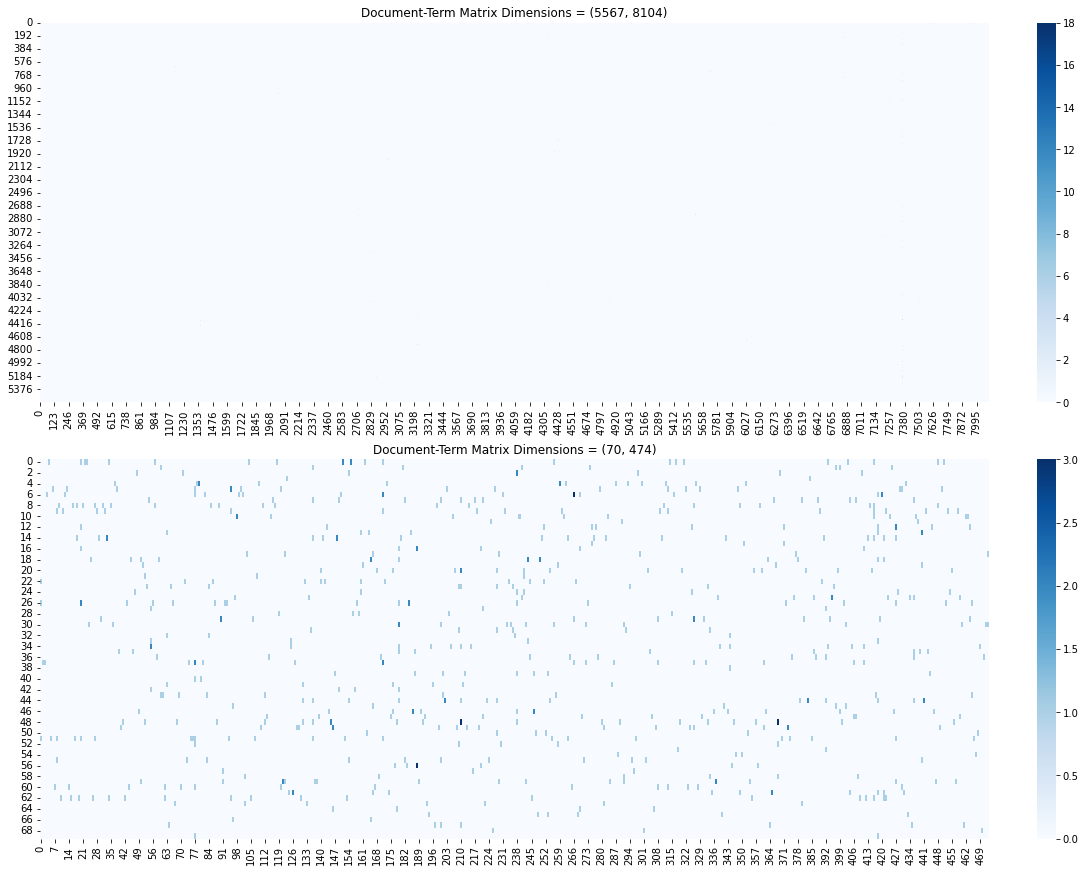

In [14]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(15,12),layout="constrained")
sns.heatmap(X1_counts.todense(),cmap='Blues',ax=axs[0])
axs[0].set_title('Document-Term Matrix Dimensions = {}'.format(X1_counts.shape))
sns.heatmap(X1_counts_sample.todense(),cmap='Blues',ax=axs[1])
axs[1].set_title('Document-Term Matrix Dimensions = {}'.format(X1_counts_sample.shape))
plt.show()

### Singular Value Decomposition

In [15]:
U,S,V = np.linalg.svd(X1_counts.todense())
U1,S1,V1 = np.linalg.svd(X1_counts_sample.todense())

#### What is the rank of the original matrix versus sample matrix?
Hint: The attribute `.shape` gives pertinent information about the number of singular values which is then employed to establish the rank.

In [16]:
print('The rank of the original document-term matrix is {}'.format(S.shape[0]))

The rank of the original document-term matrix is 5567


In [17]:
print('The rank of the sample document-term matrix is {}'.format(S1.shape[0]))

The rank of the sample document-term matrix is 70


#### What are the smallest and largest singular values?

In [18]:
print('The smallest singular value in the original document-term matrix is {}'.format(S.min()))

The smallest singular value in the original document-term matrix is 1.0232712434287807e-16


In [19]:
print('The smallest singular value in the sample matrix is {}'.format(S1.min()))

The smallest singular value in the sample matrix is 0.768235301770921


In [20]:
print('The largest singular value in the original document-term matrix equals {}'.format(S.max()))

The largest singular value in the original document-term matrix equals 51.682262269447655


In [21]:
print('The largest singular value in the sample matrix is {}'.format(S1.max()))

The largest singular value in the sample matrix is 6.924742062087608


Next we display the singular values in semi-logarithmic scale for both the original document-term matrix and the sample matrix. The singular values are plotted in the vertical axis.

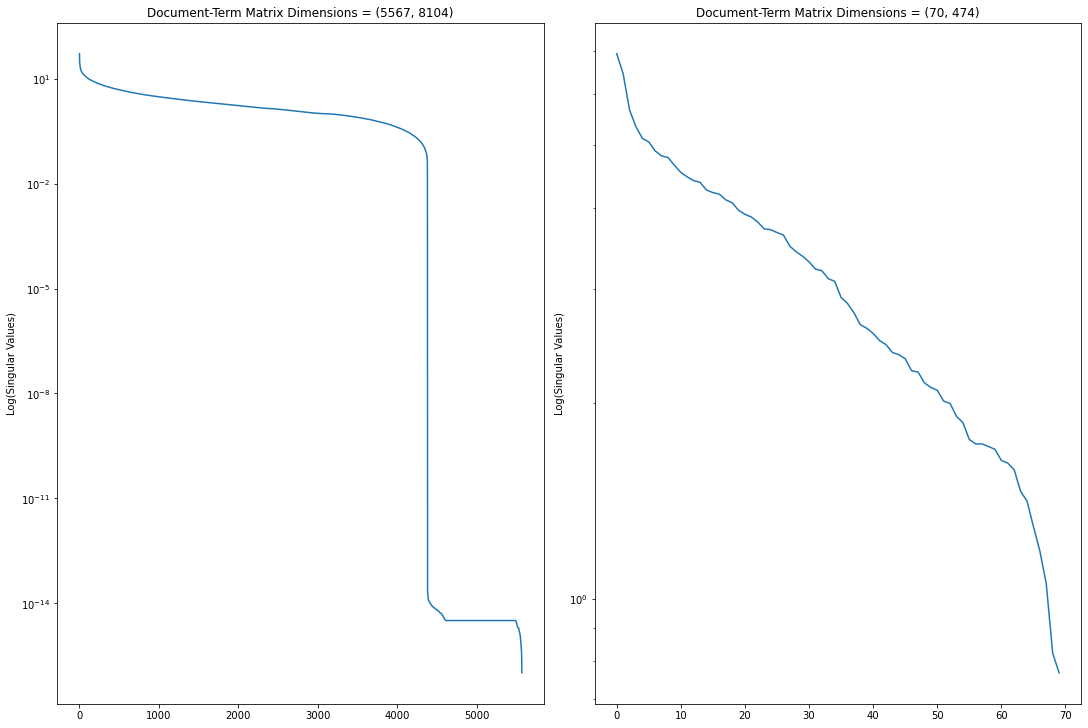

In [22]:
figsvd, axssvd = plt.subplots(ncols=2, nrows=1, figsize=(15,10),layout="constrained")
axssvd[0].semilogy(S)
axssvd[0].set_title('Document-Term Matrix Dimensions = {}'.format(X1_counts.shape))
axssvd[0].set_ylabel('Log(Singular Values)')
axssvd[1].semilogy(S1) 
axssvd[1].set_title('Document-Term Matrix Dimensions = {}'.format(X1_counts_sample.shape))
axssvd[1].set_ylabel('Log(Singular Values)')
plt.show()